In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
#Data Manipulation
import numpy as np
import pandas as pd
from google.colab import files
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Machime Learning
from sklearn import linear_model as sklearn_lm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

# Reading Data

In [3]:
datasetS = pd.read_csv("/content/drive/My Drive/DM_Assignment3/Data Classification/Dataset/wdbc.data", header=None,names=['id', 'diagnosis', 'radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'])

In [4]:
datasetS

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
datasetS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


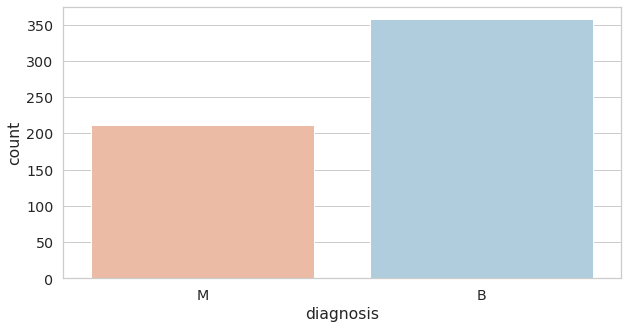

In [6]:
#Classes Distibution
plt.figure(figsize=(10,5))
sns.countplot(datasetS['diagnosis'],palette='RdBu')

In [7]:
LabelEncoder_dataset = LabelEncoder()
datasetS['diagnosis'] = LabelEncoder_dataset.fit_transform(datasetS['diagnosis'])
datasetP = datasetS

In [8]:
#Scatter plot matricis between feature variables and response variables
def plot_scatter_matrix(cols, hue):
  sns.pairplot(data=datasetS[cols], hue=hue, palette='RdBu')

In [9]:
#mean features
mean_cols = ['diagnosis','radius_mean','texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
             'compactness_mean', 'concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
#se features
se_cols = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
        'compactness_se', 'concavity_se','concave_points_se', 'symmetry_se', 'fractal_dimension_se']
#worst features
worst_cols = ['diagnosis','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
        'compactness_worst', 'concavity_worst','concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [10]:
#Correlation Matrix between feature variables and response variables
def plot_corr_matrix(cols,figsize):
  corr = datasetS[cols].corr().round(2)
  plt.figure(figsize=figsize)
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, cmap=cmap, annot=True)
  plt.show()
  return corr

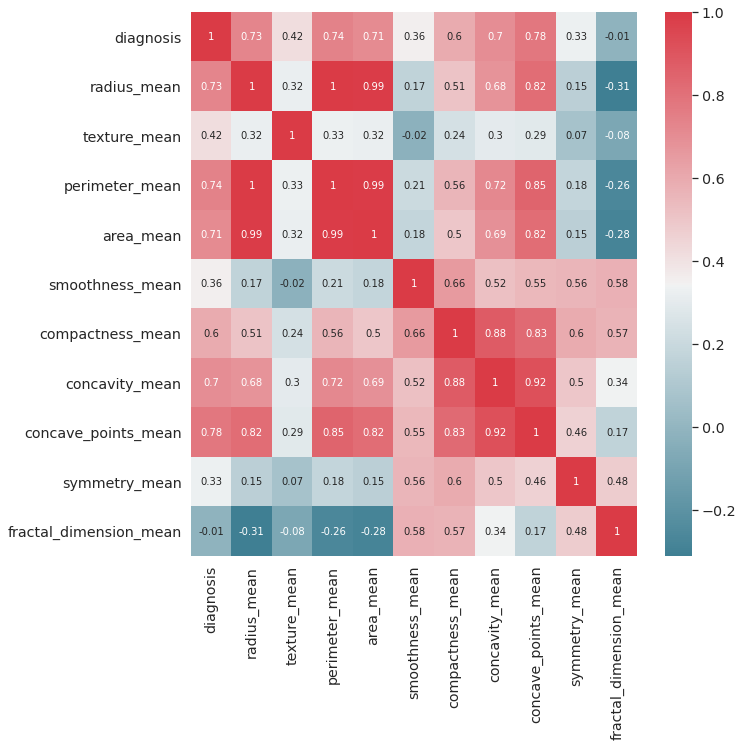

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34
concave_points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48


In [11]:
#mean correlation matrix
plot_corr_matrix(mean_cols,(10,10))

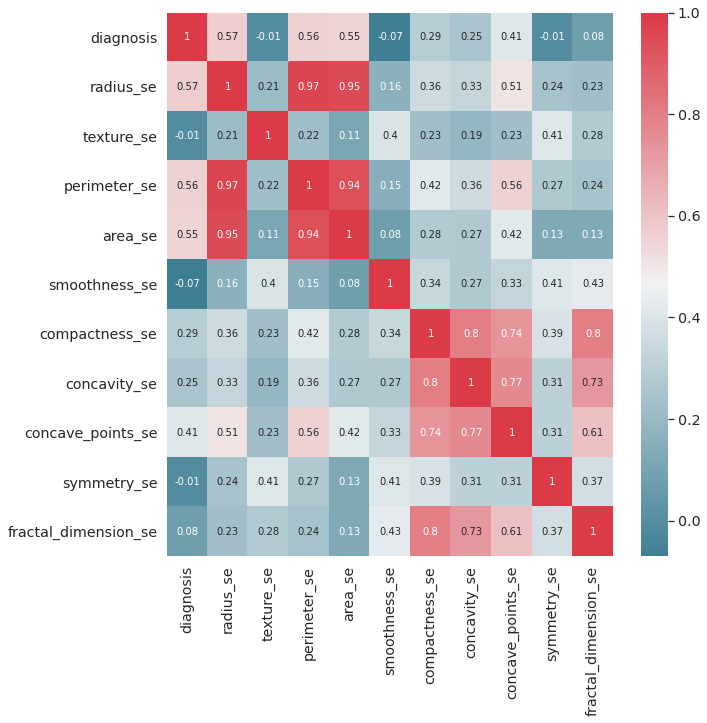

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se
diagnosis,1.00,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08
radius_se,0.57,1.00,0.21,0.97,0.95,0.16,0.36,0.33,0.51,0.24,0.23
texture_se,-0.01,0.21,1.00,0.22,0.11,0.40,0.23,0.19,0.23,0.41,0.28
perimeter_se,0.56,0.97,0.22,1.00,0.94,0.15,0.42,0.36,0.56,0.27,0.24
area_se,0.55,0.95,0.11,0.94,1.00,0.08,0.28,0.27,0.42,0.13,0.13
smoothness_se,-0.07,0.16,0.40,0.15,0.08,1.00,0.34,0.27,0.33,0.41,0.43
compactness_se,0.29,0.36,0.23,0.42,0.28,0.34,1.00,0.80,0.74,0.39,0.80
concavity_se,0.25,0.33,0.19,0.36,0.27,0.27,0.80,1.00,0.77,0.31,0.73
concave_points_se,0.41,0.51,0.23,0.56,0.42,0.33,0.74,0.77,1.00,0.31,0.61
symmetry_se,-0.01,0.24,0.41,0.27,0.13,0.41,0.39,0.31,0.31,1.00,0.37


In [12]:
#se correlation matrix
plot_corr_matrix(se_cols,(10,10))

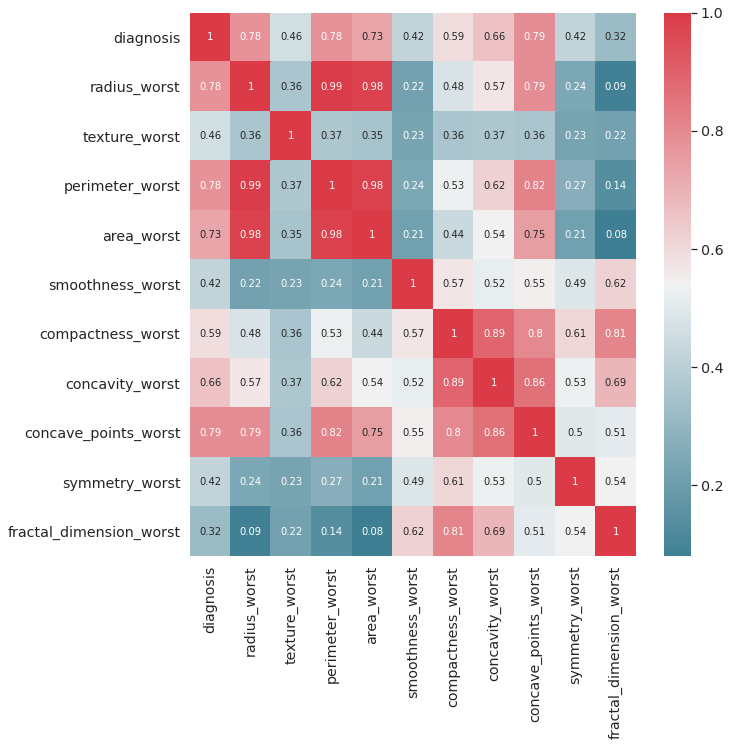

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_worst,0.78,1.00,0.36,0.99,0.98,0.22,0.48,0.57,0.79,0.24,0.09
texture_worst,0.46,0.36,1.00,0.37,0.35,0.23,0.36,0.37,0.36,0.23,0.22
perimeter_worst,0.78,0.99,0.37,1.00,0.98,0.24,0.53,0.62,0.82,0.27,0.14
area_worst,0.73,0.98,0.35,0.98,1.00,0.21,0.44,0.54,0.75,0.21,0.08
smoothness_worst,0.42,0.22,0.23,0.24,0.21,1.00,0.57,0.52,0.55,0.49,0.62
compactness_worst,0.59,0.48,0.36,0.53,0.44,0.57,1.00,0.89,0.80,0.61,0.81
concavity_worst,0.66,0.57,0.37,0.62,0.54,0.52,0.89,1.00,0.86,0.53,0.69
concave_points_worst,0.79,0.79,0.36,0.82,0.75,0.55,0.80,0.86,1.00,0.50,0.51
symmetry_worst,0.42,0.24,0.23,0.27,0.21,0.49,0.61,0.53,0.50,1.00,0.54


In [13]:
#worst correlation matrix
plot_corr_matrix(worst_cols,(10,10))

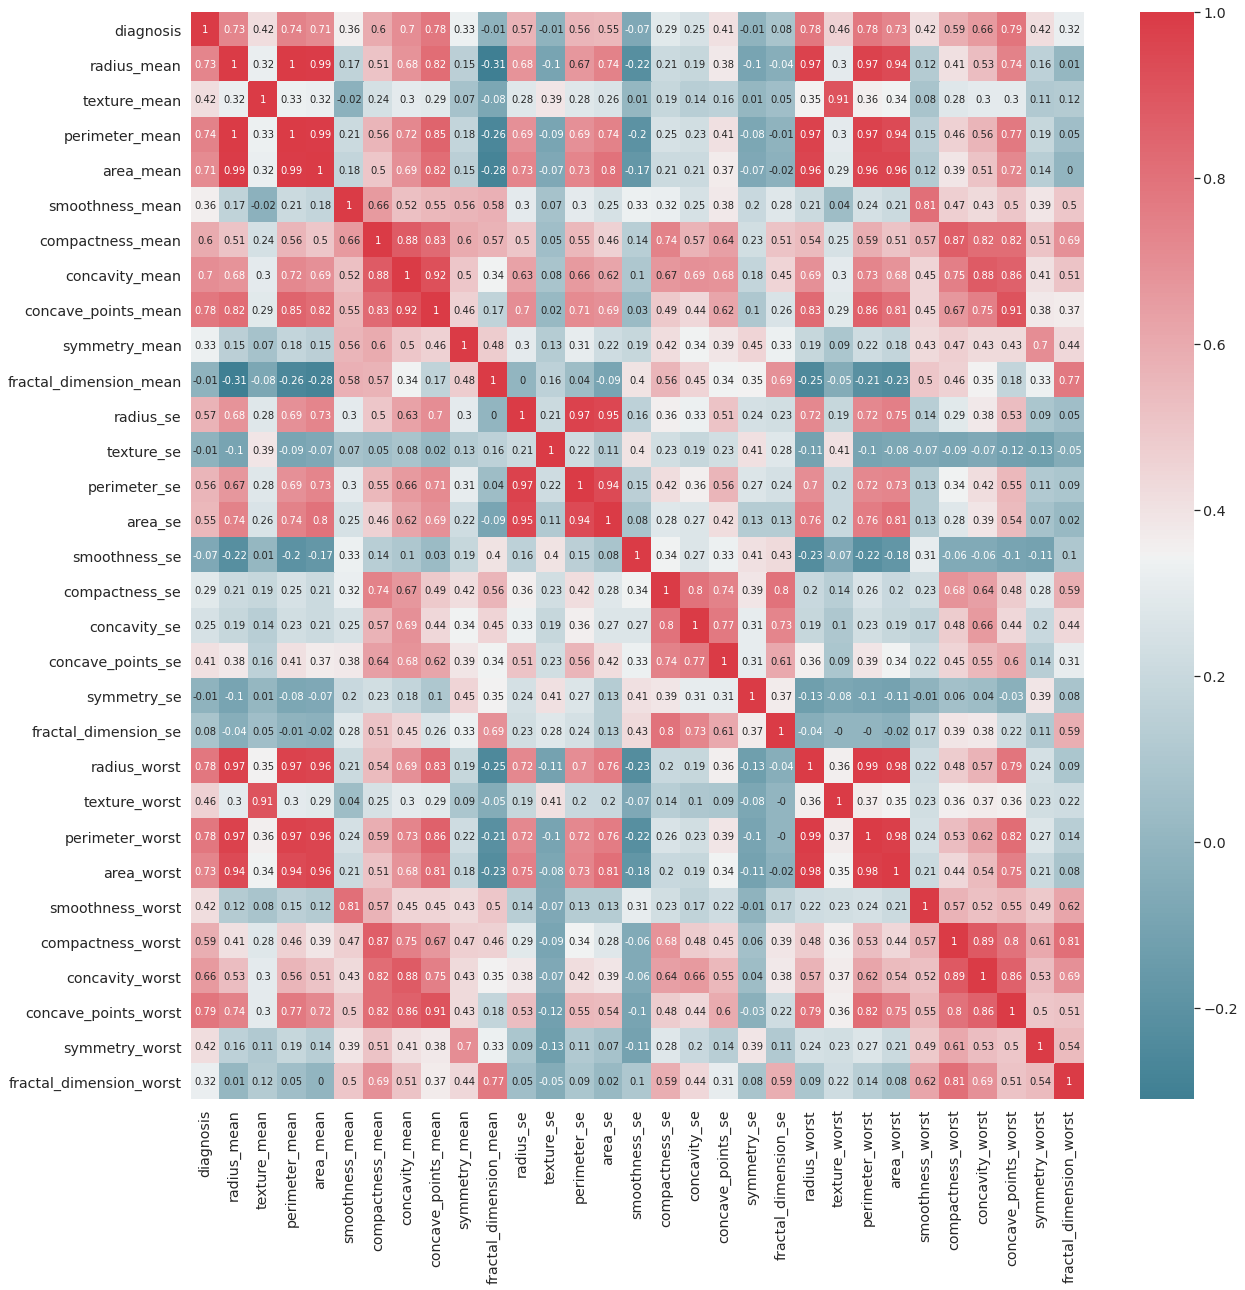

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


In [14]:
#dataset correlation matrix
plot_corr_matrix(datasetS.columns.drop('id'),(20,20))

#Feature Selection

######From the heatmap we found that **radius_mean, perimeter_mean, area_mean,compactness_mean, concavity_mean, concave_points_mean,radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst and concave_points_worst** are highly correlated with the response variable **diagnosis**, So we kept them as our feature variables and droping everything else.

In [15]:
#Selecting highly correlated features
highly_correlated = ['id', 'diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
        'compactness_mean', 'concavity_mean', 'concave_points_mean',
        'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
        'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
        'concave_points_worst']
datasetS = datasetS[highly_correlated]

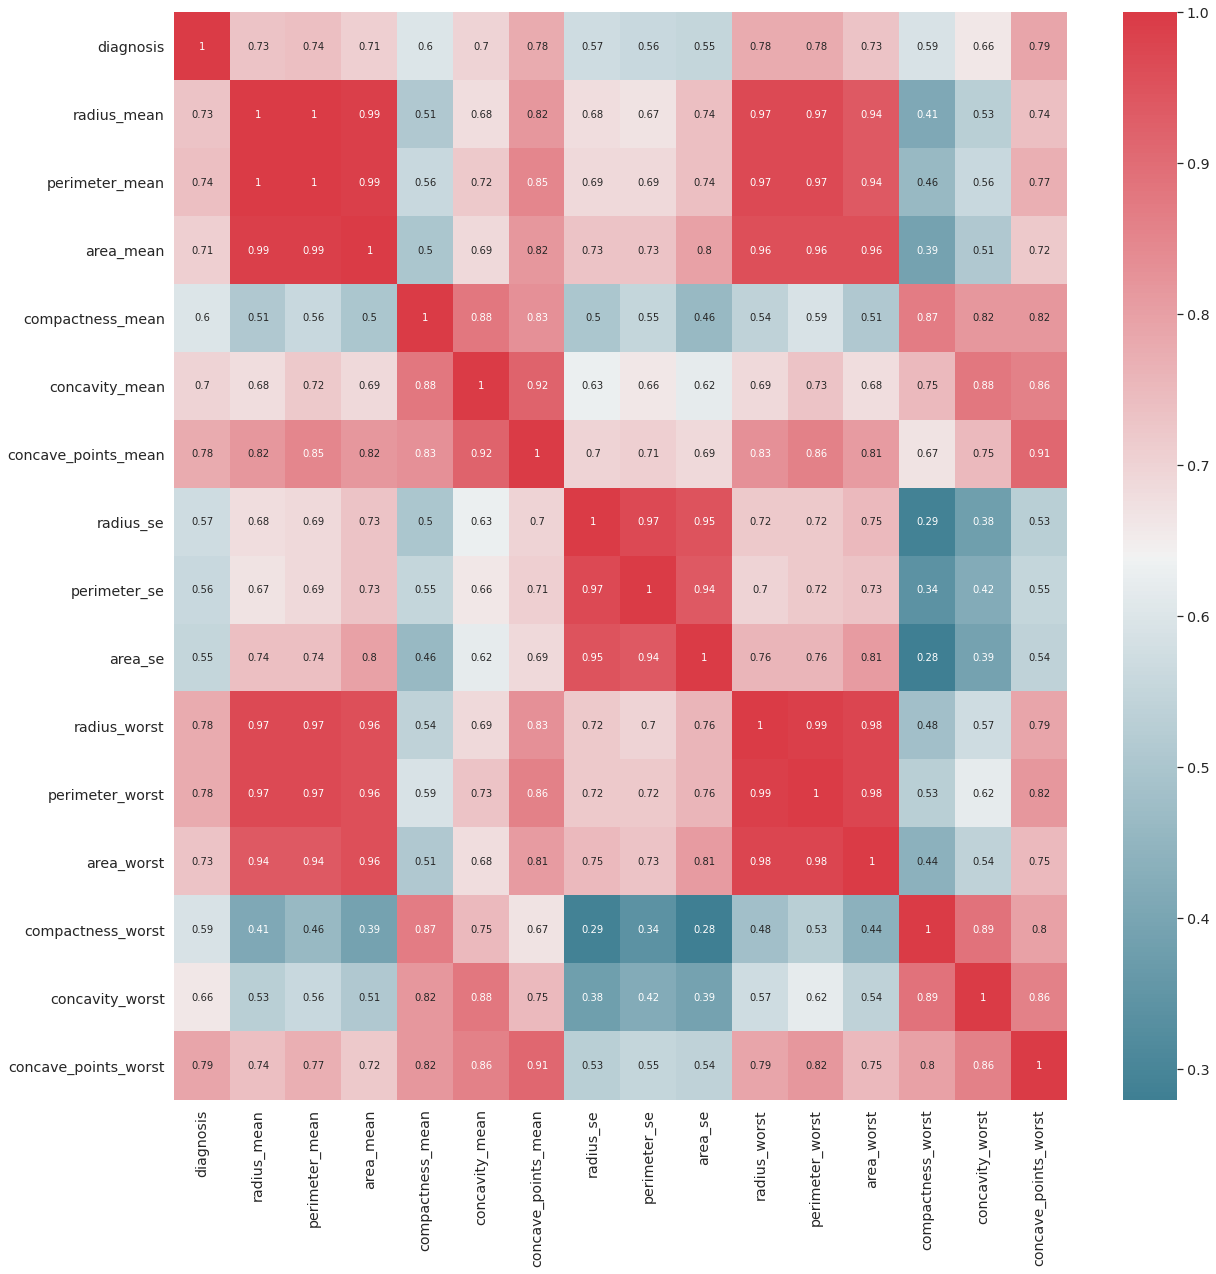

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
diagnosis,1.00,0.73,0.74,0.71,0.60,0.70,0.78,0.57,0.56,0.55,0.78,0.78,0.73,0.59,0.66,0.79
radius_mean,0.73,1.00,1.00,0.99,0.51,0.68,0.82,0.68,0.67,0.74,0.97,0.97,0.94,0.41,0.53,0.74
perimeter_mean,0.74,1.00,1.00,0.99,0.56,0.72,0.85,0.69,0.69,0.74,0.97,0.97,0.94,0.46,0.56,0.77
area_mean,0.71,0.99,0.99,1.00,0.50,0.69,0.82,0.73,0.73,0.80,0.96,0.96,0.96,0.39,0.51,0.72
compactness_mean,0.60,0.51,0.56,0.50,1.00,0.88,0.83,0.50,0.55,0.46,0.54,0.59,0.51,0.87,0.82,0.82
concavity_mean,0.70,0.68,0.72,0.69,0.88,1.00,0.92,0.63,0.66,0.62,0.69,0.73,0.68,0.75,0.88,0.86
concave_points_mean,0.78,0.82,0.85,0.82,0.83,0.92,1.00,0.70,0.71,0.69,0.83,0.86,0.81,0.67,0.75,0.91
radius_se,0.57,0.68,0.69,0.73,0.50,0.63,0.70,1.00,0.97,0.95,0.72,0.72,0.75,0.29,0.38,0.53
perimeter_se,0.56,0.67,0.69,0.73,0.55,0.66,0.71,0.97,1.00,0.94,0.70,0.72,0.73,0.34,0.42,0.55
area_se,0.55,0.74,0.74,0.80,0.46,0.62,0.69,0.95,0.94,1.00,0.76,0.76,0.81,0.28,0.39,0.54


In [16]:
#dataset correlation matrix
plot_corr_matrix(datasetS.columns.drop('id'),(20,20))

######From the second heatmap we found that **concave_points_worst** the highest correlated feature variable with **diagnosis** is also highly correlated with all the other feature variables, Since One of the assumptions of linear regression is that the feature variables need to be uncorrelated with each other, we will drop all the feature variables keeping only the highest correlated with the response variable.

In [17]:
#droping highly correlated features
highly_correlated = ['id', 'diagnosis', 'concave_points_worst']
datasetS = datasetS[highly_correlated]

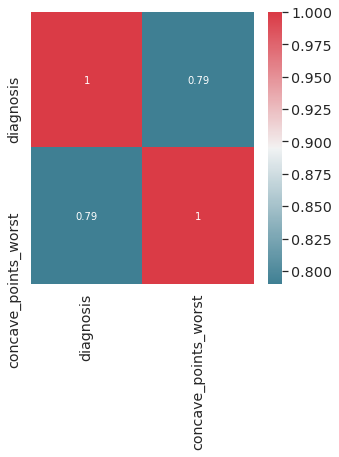

,diagnosis,concave_points_worst
diagnosis,1.00,0.79
concave_points_worst,0.79,1.00


In [18]:
#dataset correlation matrix
plot_corr_matrix(datasetS.columns.drop('id'),(5,5))

###Data Splitting

In [19]:
X = datasetS.drop(['id','diagnosis'],axis=1).values
Y = datasetS['diagnosis'].values
X.shape

LabelEncoder_Y = LabelEncoder()
Y = LabelEncoder_Y.fit_transform(Y)
Y = Y.reshape((569,1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0, stratify=Y)


Y_train = Y_train.reshape(426,)
Y_test = Y_test.reshape(143,)

###Feature Normalization

In [20]:
norm = np.linalg.norm(X_train)
X_train_normalized = X_train/norm
norm = np.linalg.norm(X_test)
X_test_normalized = X_test/norm

###Feature Standarization

In [21]:
std_scaler = StandardScaler()
X_train_scaler = std_scaler.fit(X_train)
X_test_scaler = std_scaler.fit(X_test)
X_train_standardized = X_train_scaler.transform(X_train)
X_test_standardized = X_test_scaler.transform(X_test)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#Classification after feature selection

In [22]:
def classification(X_train,X_test,Y_train,Y_test):
  grid = {"C": np.logspace(-3,3,7)}
  logreg = LogisticRegression()
  logreg_cv = GridSearchCV(logreg,grid)
  logreg_cv_fit = logreg_cv.fit(X_train,Y_train)
  print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
  print("accuracy :",logreg_cv.best_score_)
  return logreg_cv_fit

In [23]:
logreg_cv_fit = classification(X_train_standardized,X_test_standardized,Y_train,Y_test)

tuned hpyerparameters :(best parameters)  {'C': 1.0}
accuracy : 0.9107523939808482


####Evaluation

In [24]:
def evaluation(X_train,X_test,Y_train,Y_test,logreg_cv_fit):
  predictions = logreg_cv_fit.predict(X_test)
  logreg_cv_fit.score(X_train,Y_train)


  predictions_nominal = ["Malignant" if p == 1 else "Benign" for p in predictions]
  Y_test_nominal = ["Malignant" if p == 1 else "Benign" for p in Y_test]
  Y_test_nominal1 = ["Malignant" if p == 1 else "Benign" for p in Y_train]

  print(classification_report(Y_test_nominal, predictions_nominal, digits=3, zero_division=0))
  cfm = confusion_matrix(Y_test_nominal, predictions_nominal)

  true_negative = cfm[0][0]
  false_positive = cfm[0][1]
  false_negative = cfm[1][0]
  true_positive = cfm[1][1]

  print('Confusion Matrix: \n', cfm, '\n')

  print('True Negative:', true_negative)
  print('False Positive:', false_positive)
  print('False Negative:', false_negative)
  print('True Positive:', true_positive)
  print('Correct Predictions', round((true_negative+true_positive) / (true_negative+true_positive+false_positive+ false_negative) * 100,1), '%')
  print('-----------------------------------------------------------------------------------------------------------------------\n')

  C = np.logspace(-3,3,7)
  for c in C:
    print("C:", c)
    clf = LogisticRegression(C=c, random_state=0).fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    print("accuracy: ",clf.score(X_train, Y_train))
    predictions_nominal = ["Malignant" if p == 1 else "Benign" for p in predictions]
    Y_test_nominal = ["Malignant" if p == 1 else "Benign" for p in Y_test]
    Y_test_nominal1 = ["Malignant" if p == 1 else "Benign" for p in Y_train]

    print(classification_report(Y_test_nominal, predictions_nominal, digits=3, zero_division=0))
    cfm = confusion_matrix(Y_test_nominal, predictions_nominal)

    true_negative = cfm[0][0]
    false_positive = cfm[0][1]
    false_negative = cfm[1][0]
    true_positive = cfm[1][1]

    print('Confusion Matrix: \n', cfm, '\n')

    print('True Negative:', true_negative)
    print('False Positive:', false_positive)
    print('False Negative:', false_negative)
    print('True Positive:', true_positive)
    print('Correct Predictions', round((true_negative+true_positive) / (true_negative+true_positive+false_positive+ false_negative) * 100,1), '%')
    print("------------------------------------------------------------------------------------------------------")

In [25]:
evaluation(X_train_standardized,X_test_standardized,Y_train,Y_test,logreg_cv_fit)

              precision    recall  f1-score   support

      Benign      0.942     0.900     0.920        90
   Malignant      0.842     0.906     0.873        53

    accuracy                          0.902       143
   macro avg      0.892     0.903     0.897       143
weighted avg      0.905     0.902     0.903       143

Confusion Matrix: 
 [[81  9]
 [ 5 48]] 

True Negative: 81
False Positive: 9
False Negative: 5
True Positive: 48
Correct Predictions 90.2 %
-----------------------------------------------------------------------------------------------------------------------

C: 0.001
accuracy:  0.6267605633802817
              precision    recall  f1-score   support

      Benign      0.629     1.000     0.773        90
   Malignant      0.000     0.000     0.000        53

    accuracy                          0.629       143
   macro avg      0.315     0.500     0.386       143
weighted avg      0.396     0.629     0.486       143

Confusion Matrix: 
 [[90  0]
 [53  0]] 

True 

#Feature Projection

###Data Splitting

In [26]:
X = datasetP.drop(['id','diagnosis'],axis=1).values
Y = datasetP['diagnosis'].values
X.shape

LabelEncoder_Y = LabelEncoder()
Y = LabelEncoder_Y.fit_transform(Y)
Y = Y.reshape((569,1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0, stratify=Y)


Y_train = Y_train.reshape(426,)
Y_test = Y_test.reshape(143,)

###Feature Normalization

In [27]:
norm = np.linalg.norm(X_train)
X_train_normalized = X_train/norm
norm = np.linalg.norm(X_test)
X_test_normalized = X_test/norm

###Feature Standarization

In [28]:
std_scaler = StandardScaler()
X_train_scaler = std_scaler.fit(X_train)
X_test_scaler = std_scaler.fit(X_test)
X_train_standardized = X_train_scaler.transform(X_train)
X_test_standardized = X_test_scaler.transform(X_test)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train_standardized = lda.fit_transform(X_train_standardized, Y_train)
X_test_standardized = lda.transform(X_test_standardized)


#Classification after feature projection

In [31]:
logreg_cv_fit = classification(X_train_standardized,X_test_standardized,Y_train,Y_test)

tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.97890560875513


####Evaluation

In [32]:
evaluation(X_train_standardized,X_test_standardized,Y_train,Y_test,logreg_cv_fit)

              precision    recall  f1-score   support

      Benign      0.947     0.989     0.967        90
   Malignant      0.980     0.906     0.941        53

    accuracy                          0.958       143
   macro avg      0.963     0.947     0.954       143
weighted avg      0.959     0.958     0.958       143

Confusion Matrix: 
 [[89  1]
 [ 5 48]] 

True Negative: 89
False Positive: 1
False Negative: 5
True Positive: 48
Correct Predictions 95.8 %
-----------------------------------------------------------------------------------------------------------------------

C: 0.001
accuracy:  0.8615023474178404
              precision    recall  f1-score   support

      Benign      0.811     1.000     0.896        90
   Malignant      1.000     0.604     0.753        53

    accuracy                          0.853       143
   macro avg      0.905     0.802     0.824       143
weighted avg      0.881     0.853     0.843       143

Confusion Matrix: 
 [[90  0]
 [21 32]] 

True 